Importing Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Getting the Data

In [2]:
data = pd.read_csv("Advertising.csv")

In [3]:
# Getting the first 5 rows of the dataset
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Data Analysis

In [4]:
# Checking the column
data['Unnamed: 0']

0        1
1        2
2        3
3        4
4        5
      ... 
195    196
196    197
197    198
198    199
199    200
Name: Unnamed: 0, Length: 200, dtype: int64

In [5]:
data = data.drop(['Unnamed: 0'], axis = 1)
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Text(0, 0.5, 'Sales')

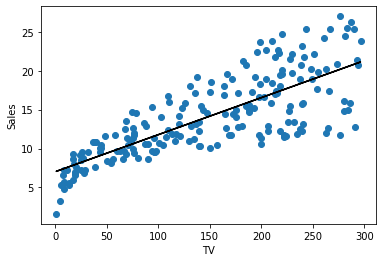

In [6]:
TV = data['TV']
Sales = data['Sales']

# Perform linear regression
coefficients = np.polyfit(TV, Sales, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * TV + b

plt.scatter(TV, Sales)
plt.plot(TV, best_fit_line, color='black', label='Best Fit Line')

plt.xlabel('TV')
plt.ylabel('Sales')

# Conclusion -> Sales are increase with increase in TV

Text(0, 0.5, 'Sales')

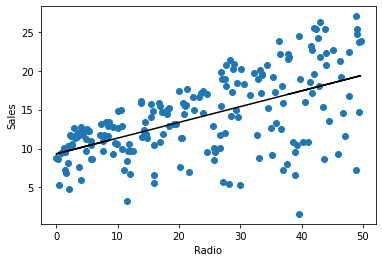

In [7]:
Radio = data['Radio']
Sales = data['Sales']

# Perform linear regression
coefficients = np.polyfit(Radio, Sales, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * Radio + b

plt.scatter(Radio, Sales)
plt.plot(Radio, best_fit_line, color='black', label='Best Fit Line')

plt.xlabel('Radio')
plt.ylabel('Sales')

# Conclusion -> Sales are increase with increase in Radio

Text(0, 0.5, 'TV')

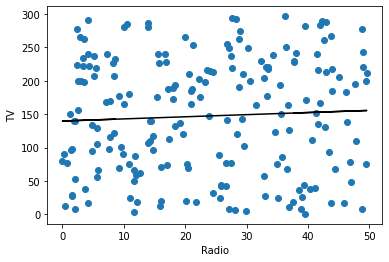

In [8]:
# Graph between TV and Radio
Radio = data['Radio']
TV = data['TV']

# Perform linear regression
coefficients = np.polyfit(Radio, TV, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * Radio + b

plt.scatter(Radio, TV)
plt.plot(Radio, best_fit_line, color='black', label='Best Fit Line')

plt.xlabel('Radio')
plt.ylabel('TV')

Text(0, 0.5, 'Sales')

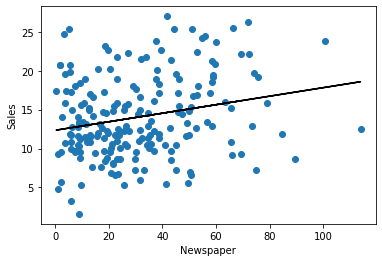

In [9]:
Newspaper = data['Newspaper']
Sales = data['Sales']

# Perform linear regression
coefficients = np.polyfit(Newspaper, Sales, 1)
m = coefficients[0]  # Slope
b = coefficients[1]  # Intercept

# Generate best fit line data
best_fit_line = m * Newspaper + b

plt.scatter(Newspaper, Sales)
plt.plot(Newspaper, best_fit_line, color='black', label='Best Fit Line')

plt.xlabel('Newspaper')
plt.ylabel('Sales')

# Conclusion -> Sales are increase with increase in Radio

Splitting the data into Training and Testing sets

In [10]:
# Split the data into training and testing sets
X = data.drop(['Sales'], axis=1)
y = data['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

Model

In [11]:
xgb = xgb.XGBRegressor(n_estimators=100, max_depth=3, reg_lambda=1, random_state=2)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.4089094653674087


In [12]:
"""Calculating the r2 score of the model"""
from sklearn.metrics import r2_score

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Print the R-squared score
print("R-squared score:", r2)

R-squared score: 0.9779877423865152


Graph between actual and predicted values

Text(0, 0.5, 'y_pred')

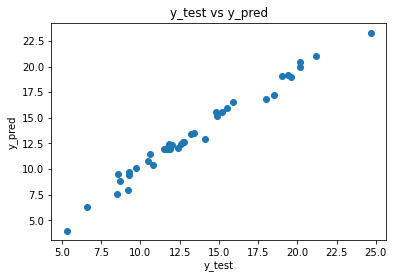

In [13]:
plt.scatter(y_test, y_pred)
plt.title('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')